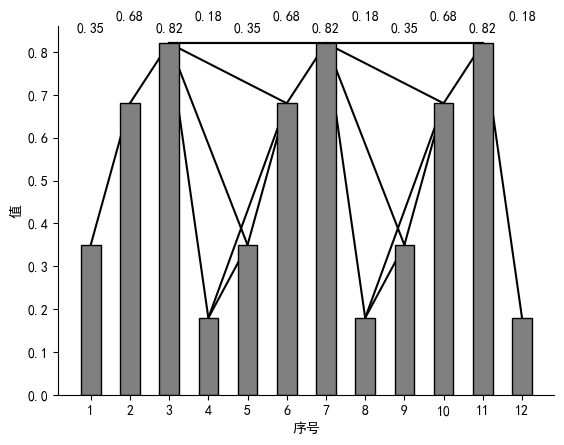

In [53]:
import matplotlib.pyplot as plt

# 中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据
values = [0.35, 0.68, 0.82, 0.18, 0.35, 0.68, 0.82, 0.18, 0.35, 0.68, 0.82, 0.18]
indices = list(range(1, len(values) + 1))

# 绘制柱状图            
plt.bar(indices, values, color='grey', edgecolor='black', zorder=1, width=0.5)

# 绘制连线，只有当一条线的两个端点之间的所有点都位于这两点连线的下方时才绘制
def can_connect(i, j, values):
    # 获取两点
    x1, y1 = i+1, values[i]
    x2, y2 = j+1, values[j]

    # 计算直线方程 y = mx + c 的系数 m 和 c  
    m = (y2 - y1) / (x2 - x1)
    c = y1 - m * x1

    # 检查中间的点是否都在直线下方
    for k in range(i+1, j):
        yk = values[k]   
        xk = k+1
        # 计算直线在 xk 处的 y 值
        line_y = m * xk + c
        # 如果点在直线上方，返回 False
        if yk > line_y:
            return False
    return True

# 绘制符合条件的连线
for i in range(len(values)):
    for j in range(i+1, len(values)):
        if can_connect(i, j, values):
            plt.plot([indices[i], indices[j]], [values[i], values[j]], 'k-', zorder=0)


for i, v in enumerate(values):
    # 如果是偶数
    if i % 2 == 0:
        plt.text(i+1, max(values)+0.02, str(v), ha='center', va='bottom')
    # 如果是奇数
    else:
        plt.text(i+1, max(values)+0.05, str(v), ha='center', va='bottom')


plt.xlabel('序号')
plt.ylabel('值')
plt.xticks(indices)

# 不显示右方和上方的边框
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 显示图表
plt.show()

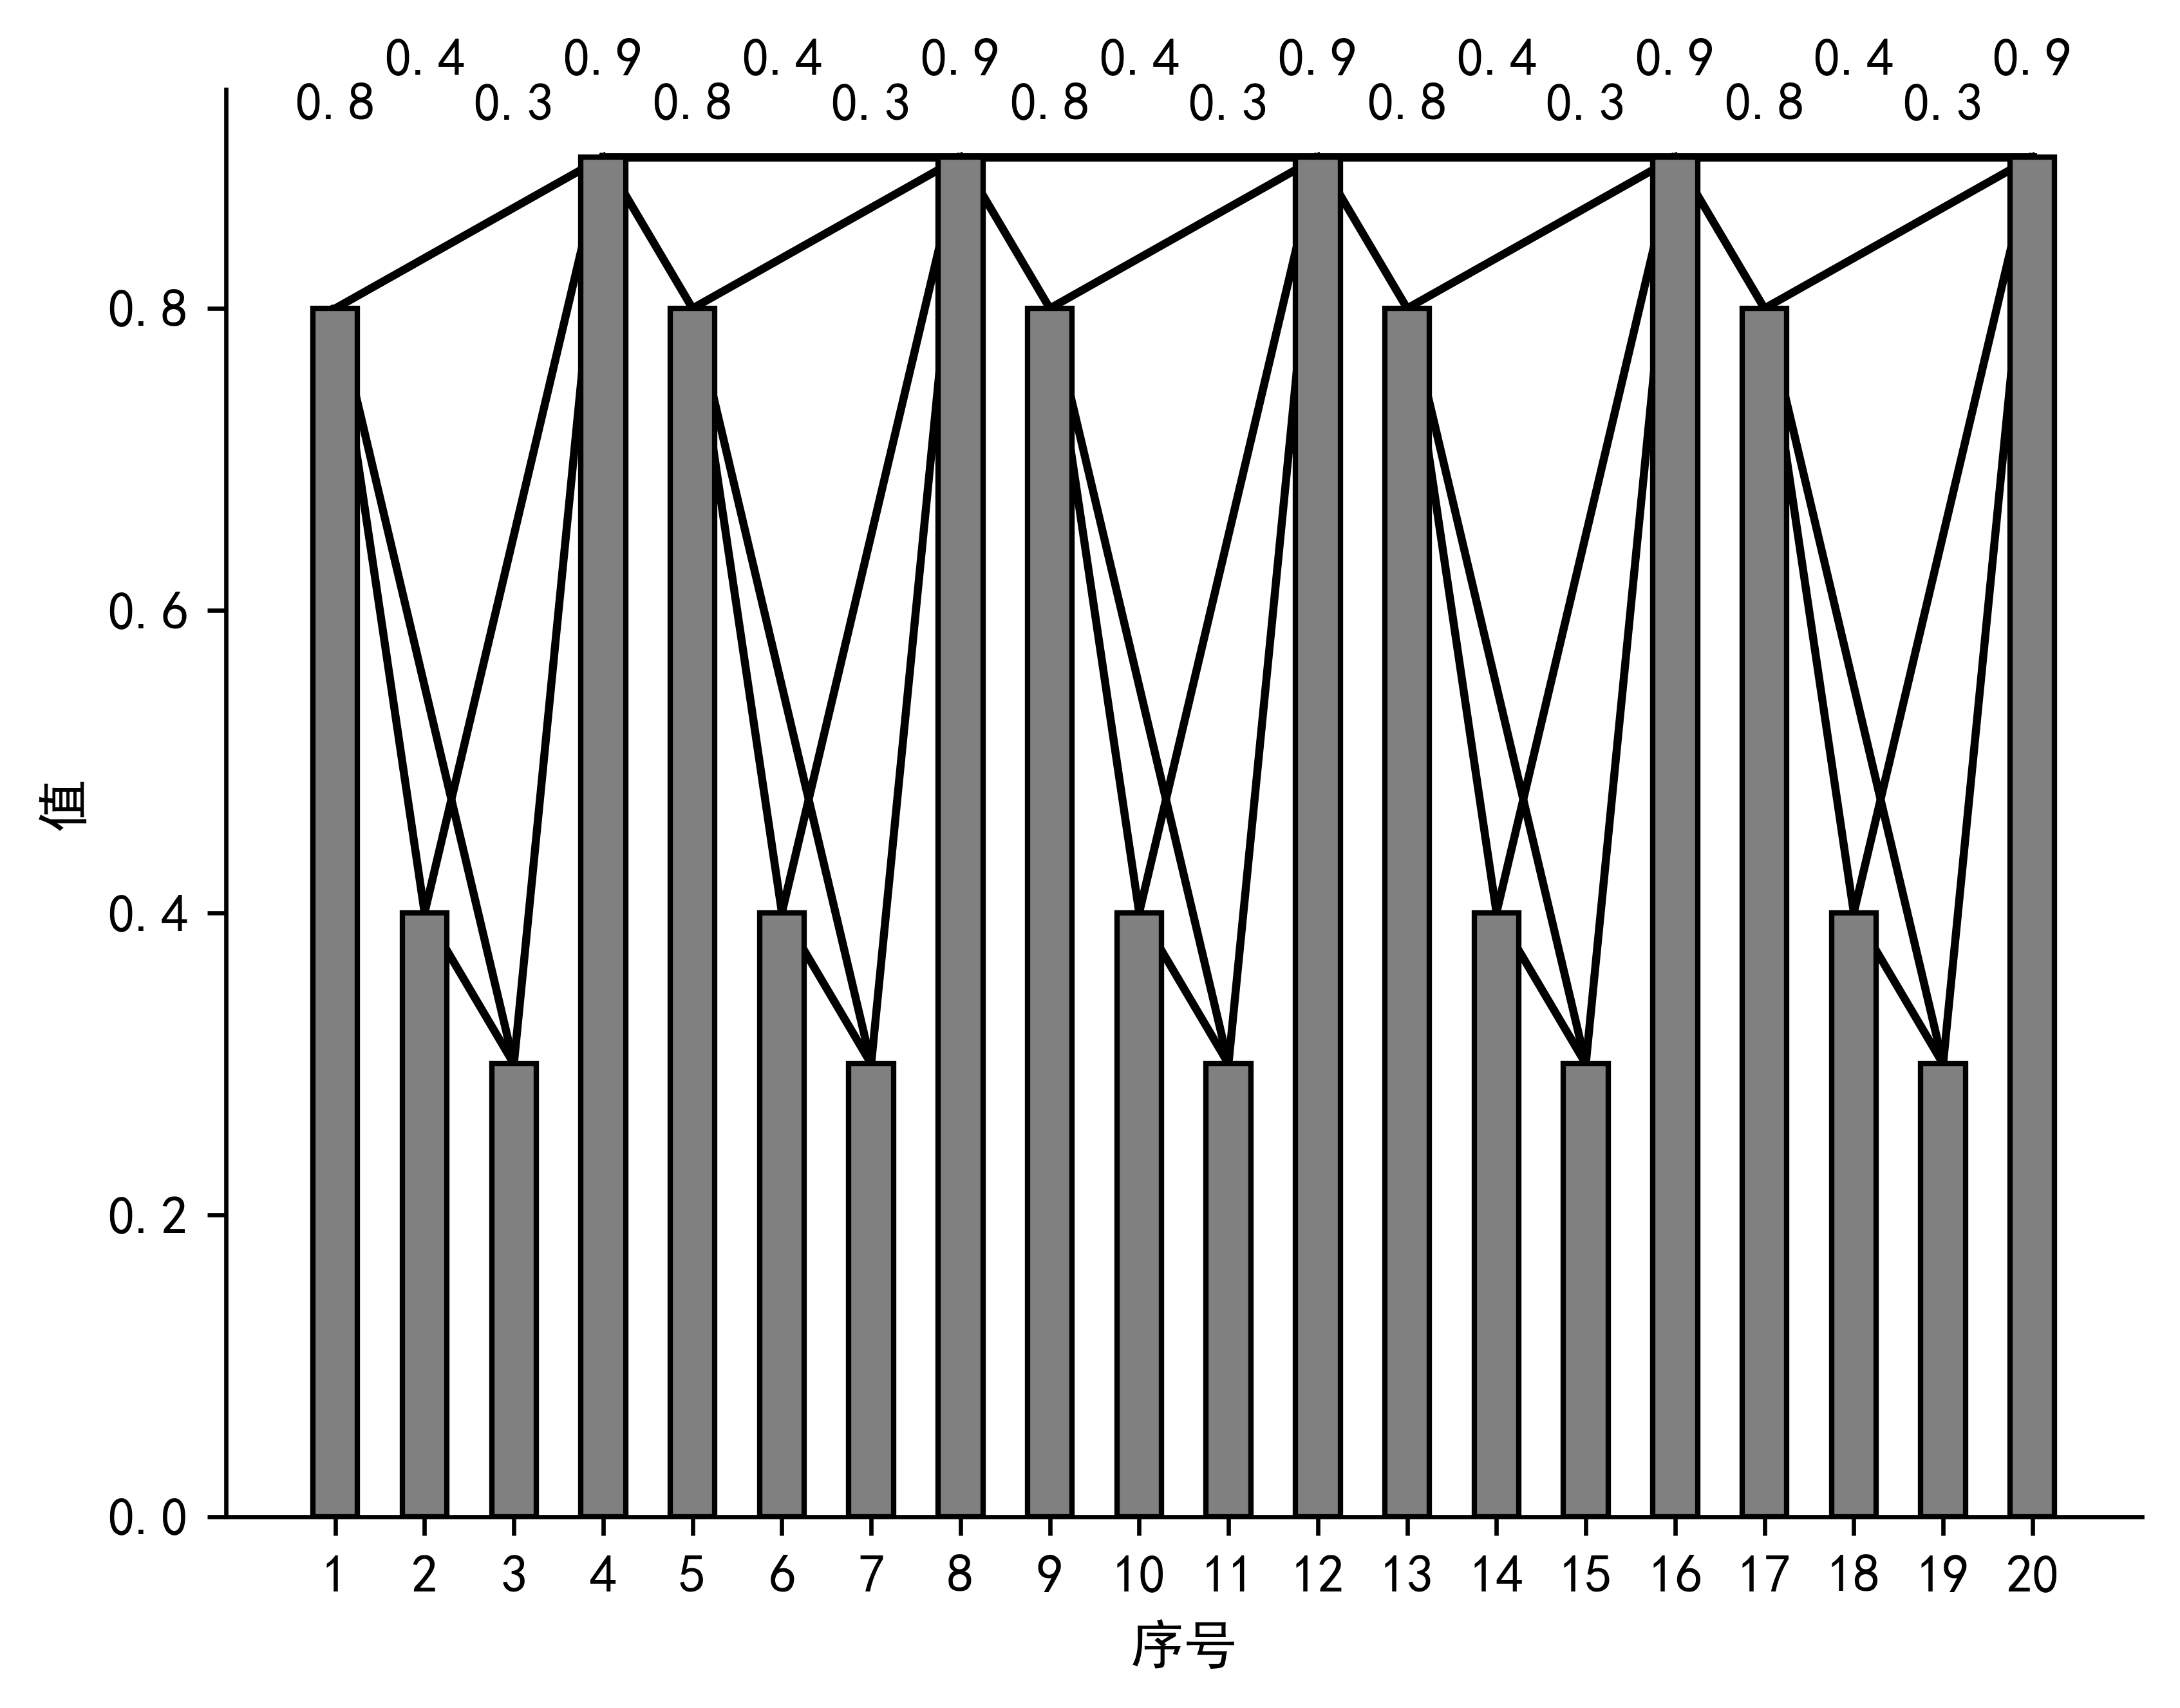

In [9]:
import matplotlib.pyplot as plt

# 中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据
# values = [0.35, 0.68, 0.82, 0.18, 0.35, 0.68, 0.82, 0.18, 0.35, 0.68, 0.82, 0.18]
values = [0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9]
indices = list(range(1, len(values) + 1))

# 绘制柱状图            
plt.bar(indices, values, color='grey', edgecolor='black', zorder=1, width=0.5)

# 绘制连线，只有当一条线的两个端点之间的所有点都位于这两点连线的下方时才绘制
def can_connect(i, j, values):
    # 获取两点
    x1, y1 = i+1, values[i]
    x2, y2 = j+1, values[j]

    # 计算直线方程 y = mx + c 的系数 m 和 c  
    m = (y2 - y1) / (x2 - x1)
    c = y1 - m * x1

    # 检查中间的点是否都在直线下方
    for k in range(i+1, j):
        yk = values[k]   
        xk = k+1
        # 计算直线在 xk 处的 y 值
        line_y = m * xk + c
        # 如果点在直线上方，返回 False
        if yk > line_y:
            return False
    return True

# 绘制符合条件的连线
for i in range(len(values)):
    for j in range(i+1, len(values)):
        if can_connect(i, j, values):
            plt.plot([indices[i], indices[j]], [values[i], values[j]], 'k-', zorder=0)


for i, v in enumerate(values):
    # 如果是偶数
    if i % 2 == 0:
        plt.text(i+1, max(values)+0.02, str(v), ha='center', va='bottom')
    # 如果是奇数
    else:
        plt.text(i+1, max(values)+0.05, str(v), ha='center', va='bottom')


plt.xlabel('序号')
plt.ylabel('值')
plt.xticks(indices)

# 不显示右方和上方的边框
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 设置图的dpi为600
plt.gcf().set_dpi(600)

# 显示图表
plt.show()


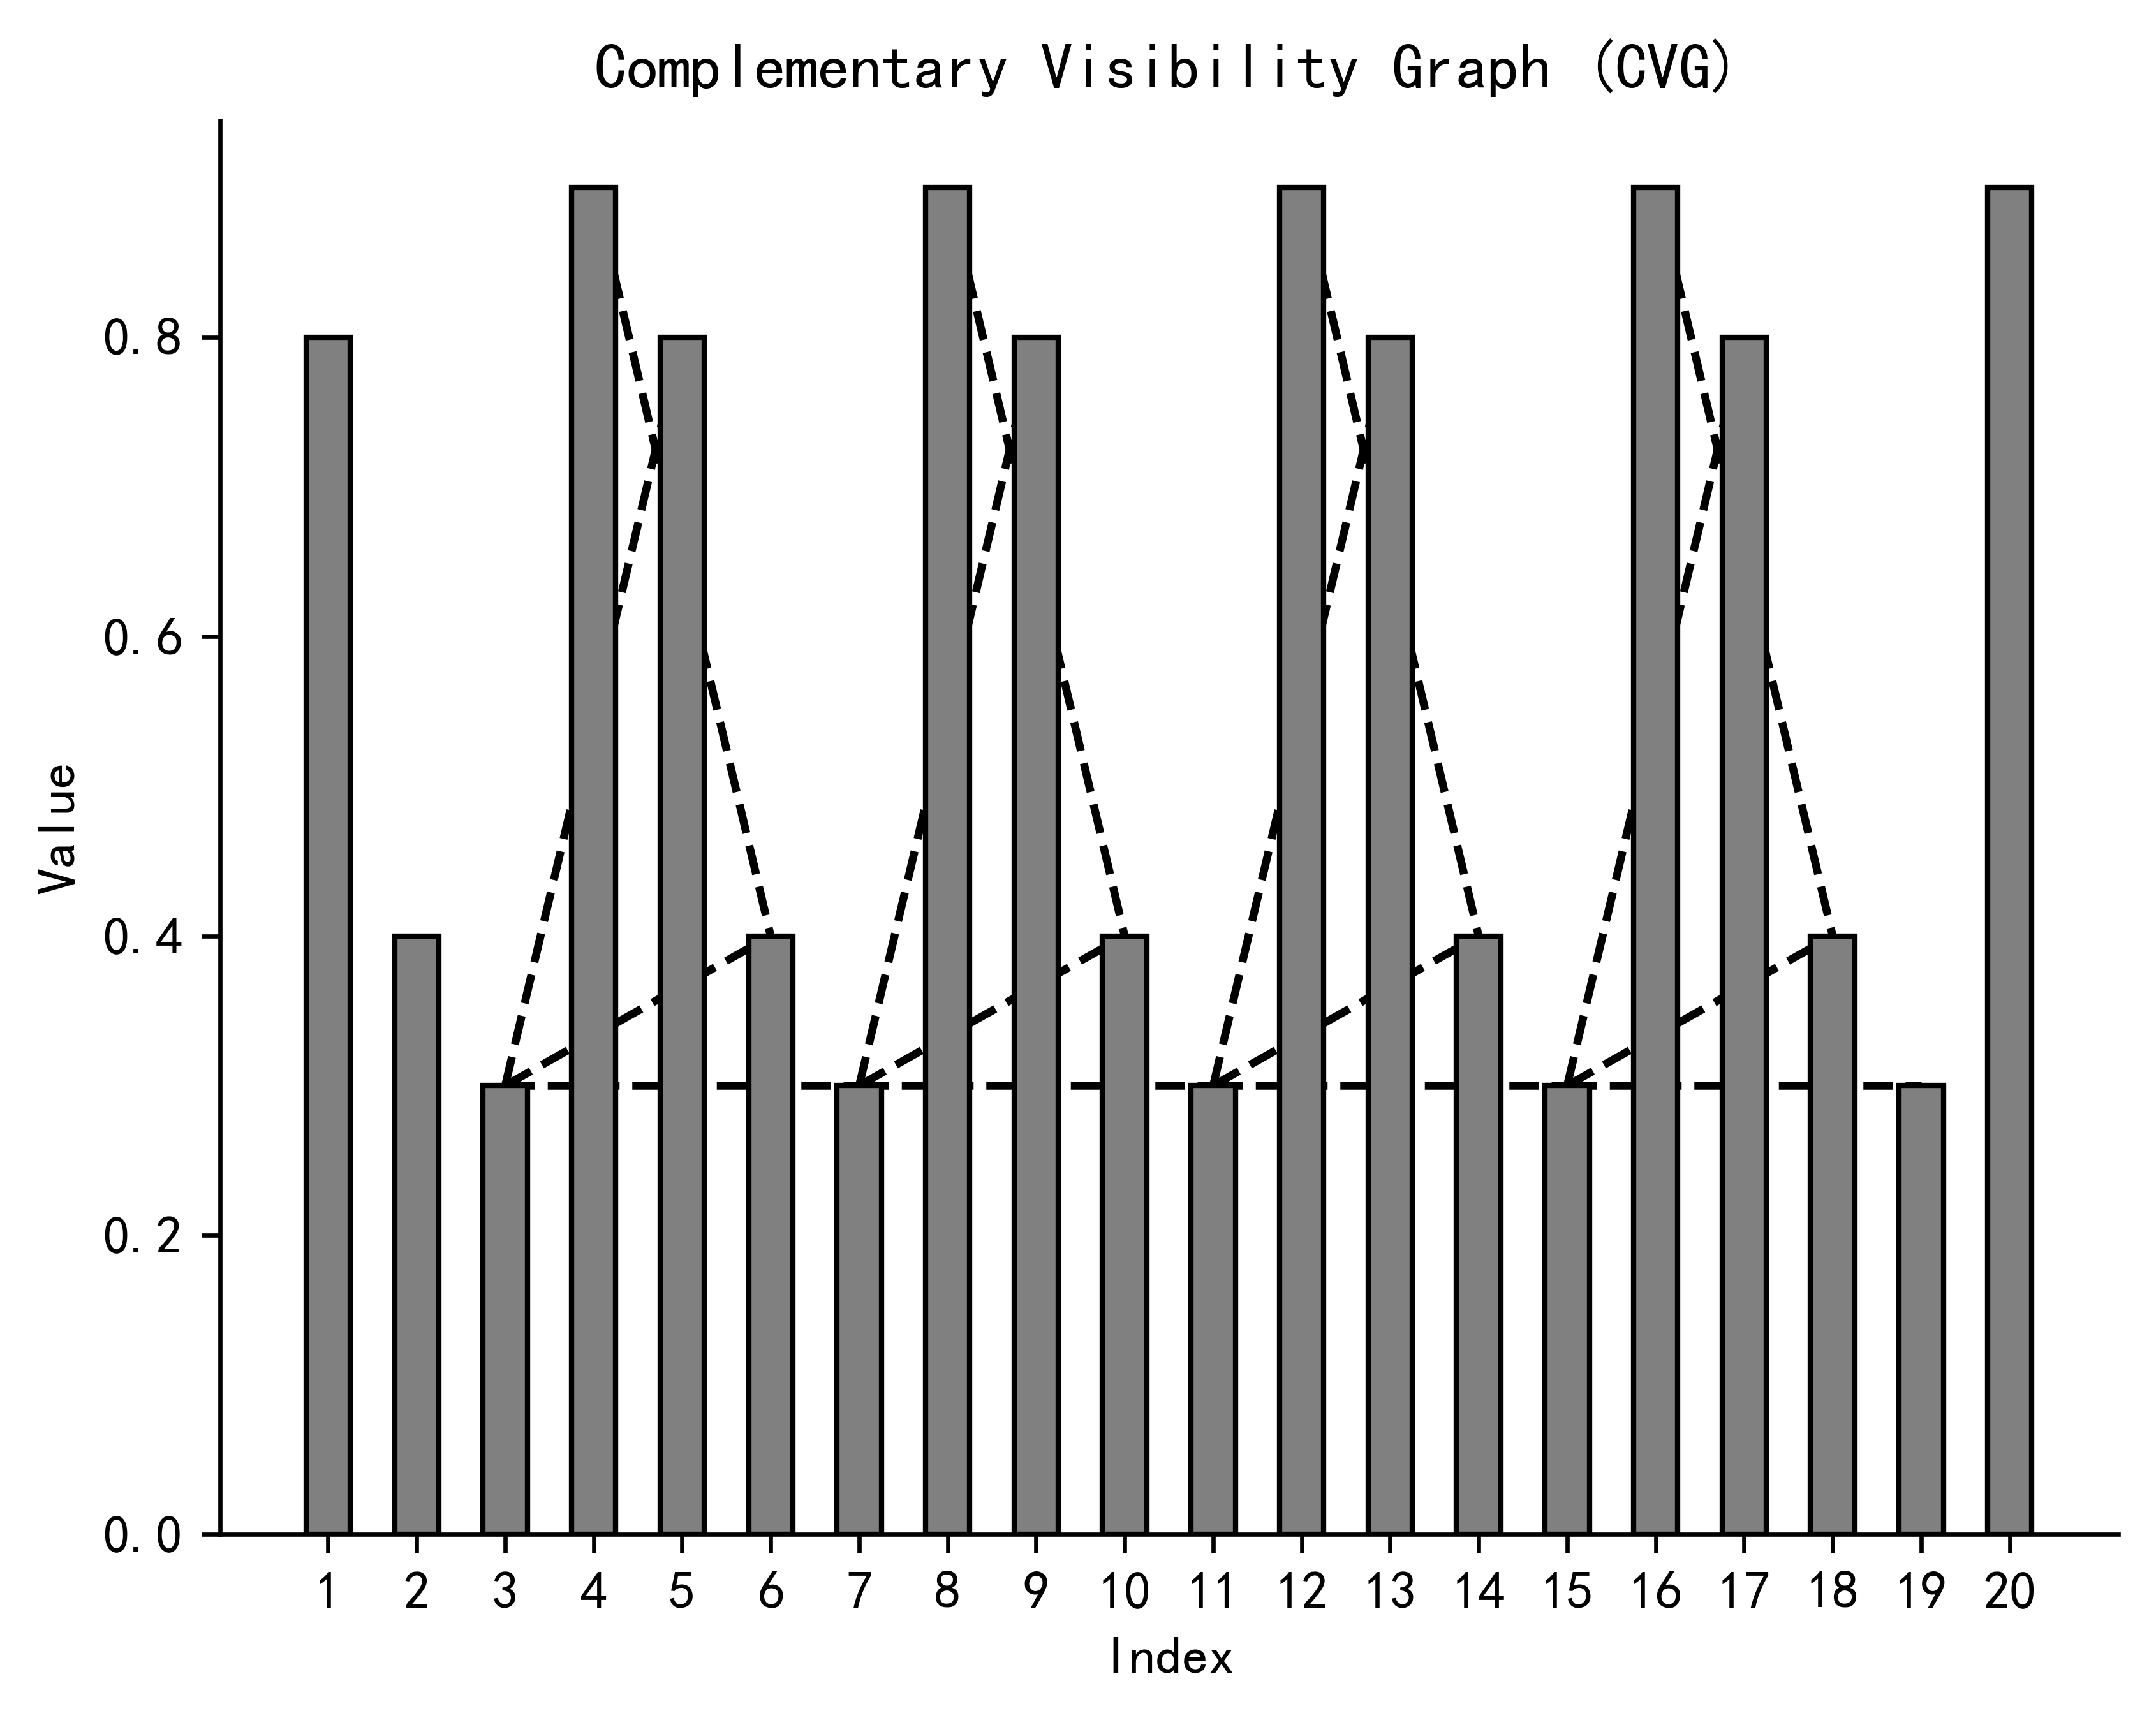

In [6]:
import matplotlib.pyplot as plt

# 给定的时间序列数据
t = [0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9]
indices = list(range(1, len(t) + 1))

# 绘制柱状图，调整柱子宽度以增加间距
plt.bar(indices, t, color='grey', edgecolor='black', zorder=1, width=0.5)

# 判断两个节点是否应该连接的函数
def should_connect_CVG(i, j, values):
    x_i, y_i = i + 1, values[i]
    x_j, y_j = j + 1, values[j]
    if i + 1 == j:  # 最近邻不连接
        return False
    for k in range(i + 1, j):
        x_k = k + 1
        y_k = values[k]
        # 计算预期的 y_k 值
        expected_yk = y_j + (y_i - y_j) * (x_j - x_k) / (x_j - x_i)
        if y_k <= expected_yk:
            return False  # 如果有点在直线以下，说明点 i 和 j 之间是不被阻挡的
    return True  # 所有中间点都在直线上方

# 绘制符合 CVG 条件的虚线
for i in range(len(t)):
    for j in range(i + 1, len(t)):
        if should_connect_CVG(i, j, t):
            plt.plot([indices[i], indices[j]], [t[i], t[j]], 'k--', zorder=0)  # 使用虚线连接

# 增强图表可读性
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Complementary Visibility Graph (CVG)')
plt.xticks(indices)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



# 设置图的dpi为600
plt.gcf().set_dpi(600)

# 显示图表
plt.show()


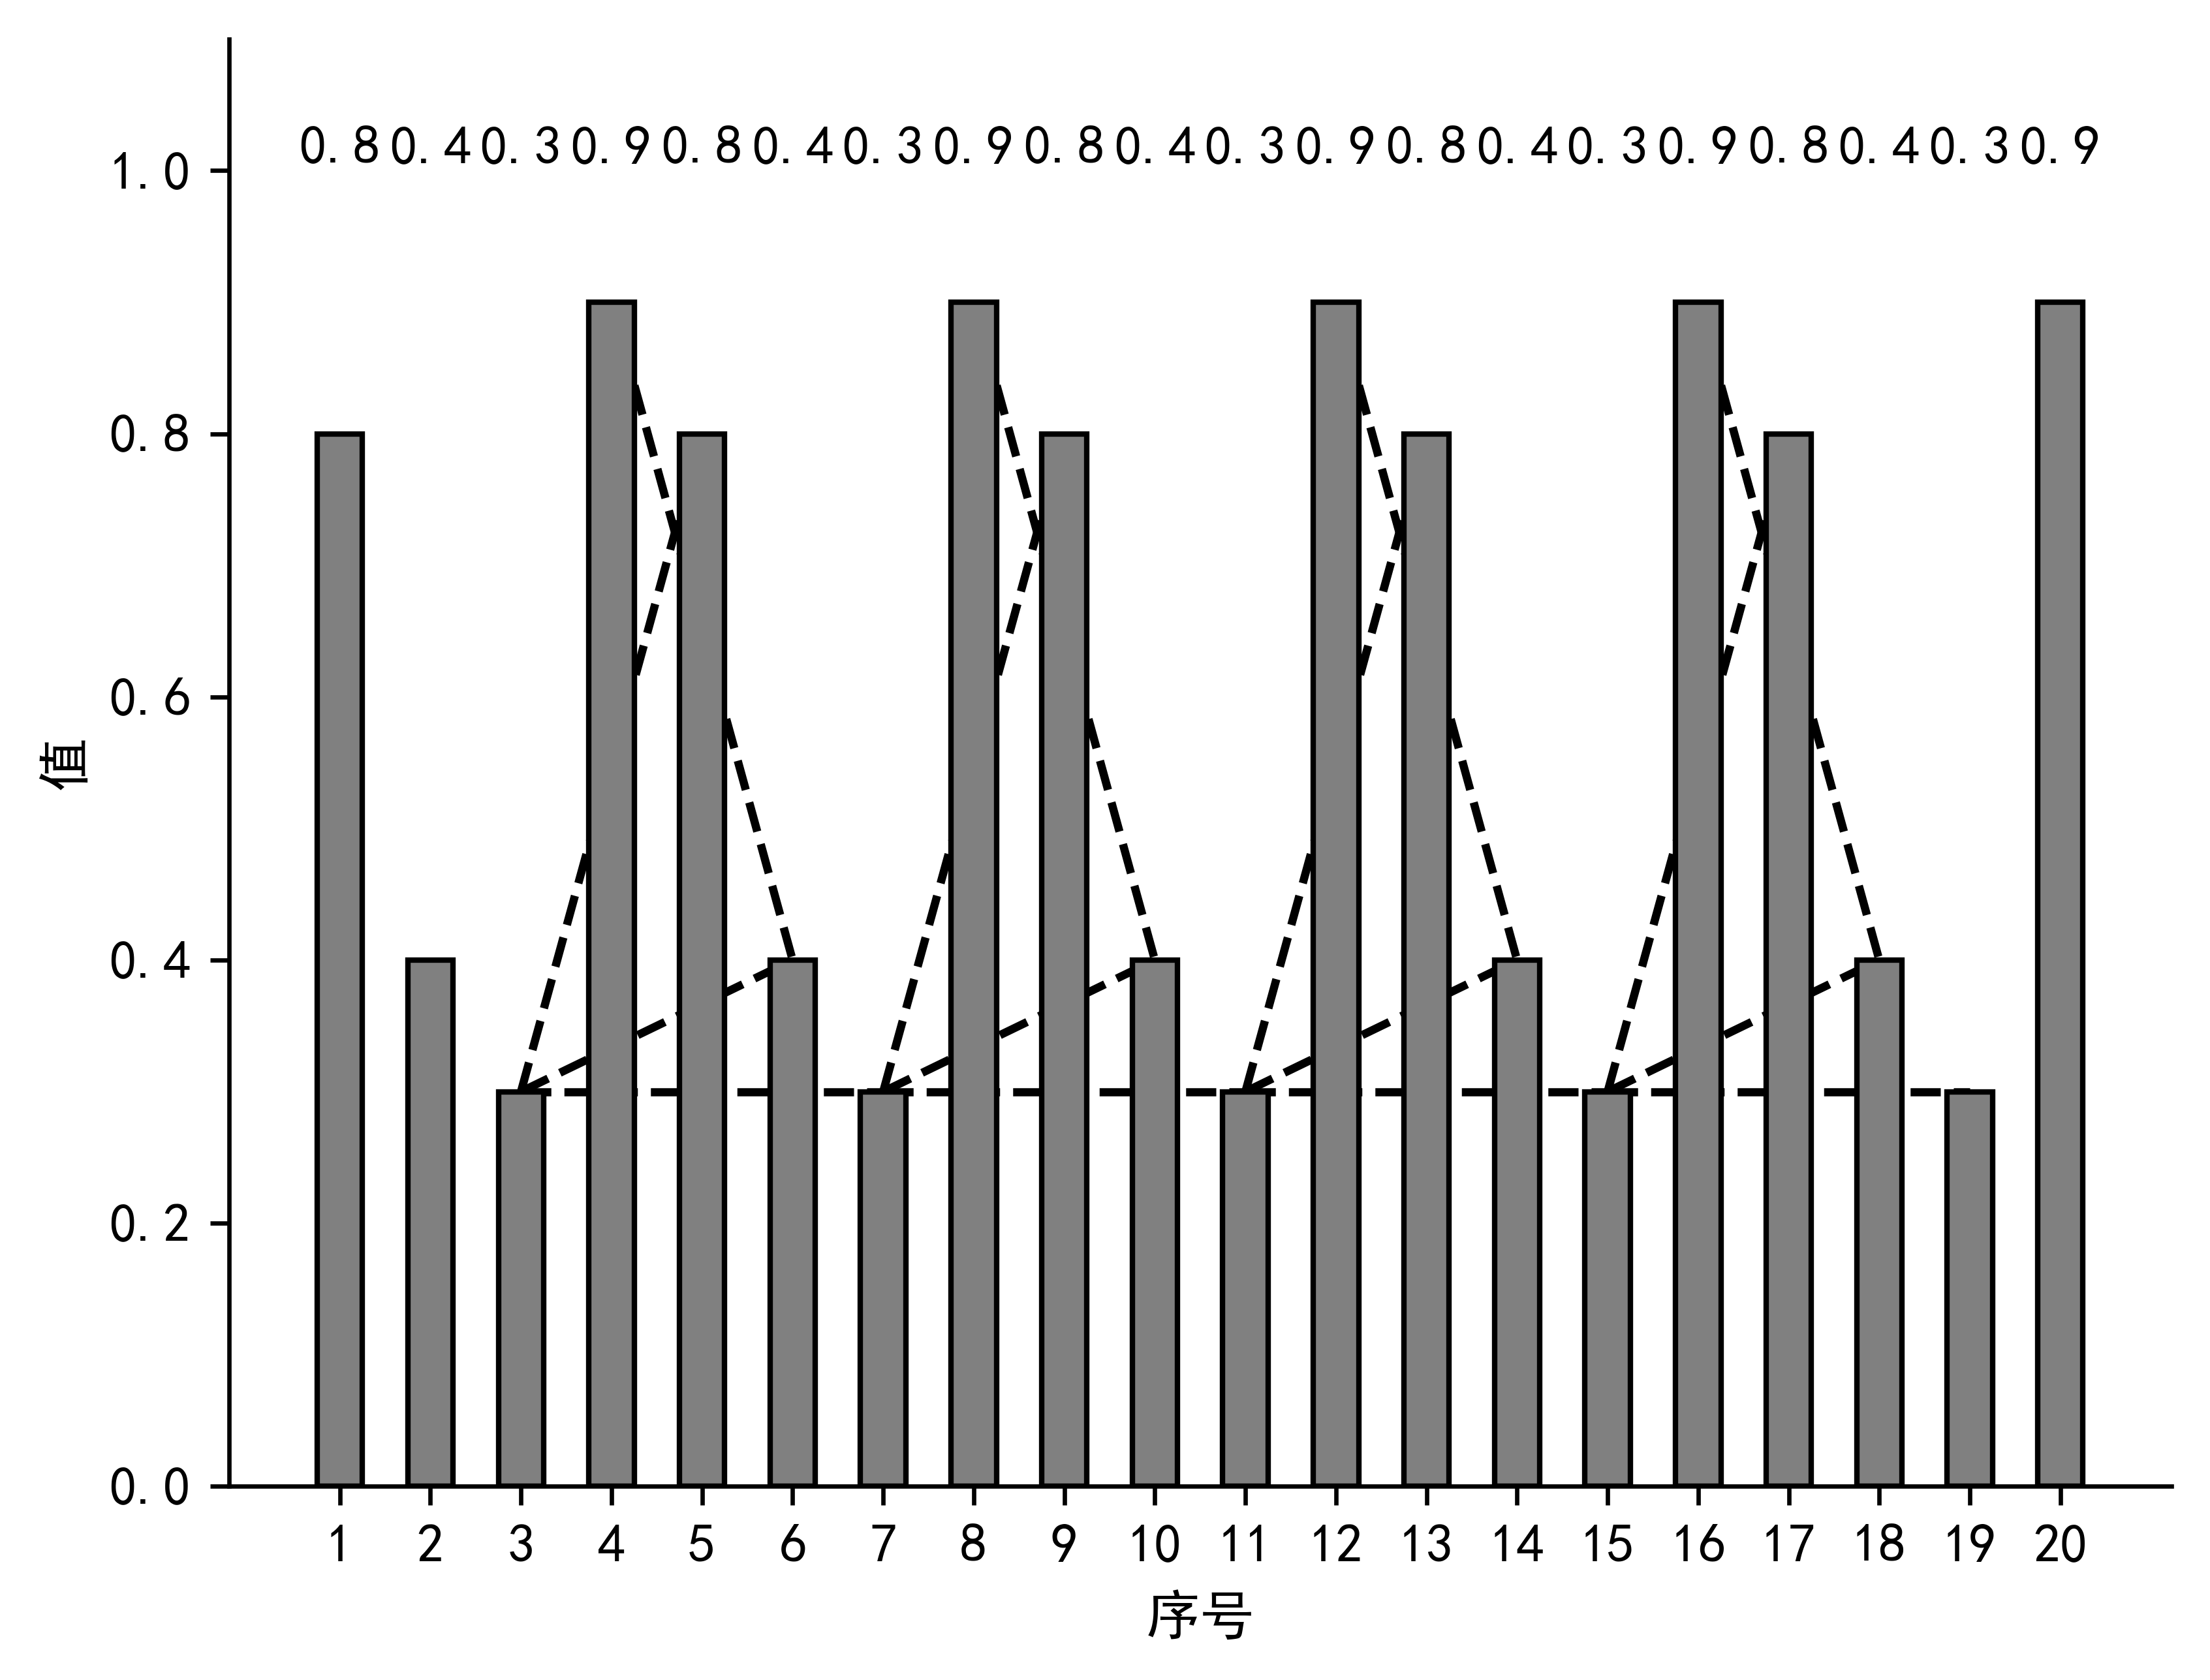

In [6]:
import matplotlib.pyplot as plt

# 给定的时间序列数据
t = [0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9]
indices = list(range(1, len(t) + 1))

# 绘制柱状图，调整柱子宽度以增加间距
plt.bar(indices, t, color='grey', edgecolor='black', zorder=1, width=0.5)

# 判断两个节点是否应该连接的函数
def should_connect_CVG(i, j, values):
    x_i, y_i = i + 1, values[i]
    x_j, y_j = j + 1, values[j]
    if i + 1 == j:  # 最近邻不连接
        return False
    for k in range(i + 1, j):
        x_k = k + 1
        y_k = values[k]
        # 计算预期的 y_k 值
        expected_yk = y_j + (y_i - y_j) * (x_j - x_k) / (x_j - x_i)
        if y_k <= expected_yk:
            return False  # 如果有点在直线以下，说明点 i 和 j 之间是不被阻挡的
    return True  # 所有中间点都在直线上方

# 绘制符合 CVG 条件的虚线
for i in range(len(t)):
    for j in range(i + 1, len(t)):
        if should_connect_CVG(i, j, t):
            plt.plot([indices[i], indices[j]], [t[i], t[j]], 'k--', zorder=0)  # 使用虚线连接

# 在图的顶部一致的高度位置添加每个柱子的值
top_height = max(t) + 0.1  # 计算顶部行的位置
for index, value in zip(indices, t):
    plt.text(index, top_height, f'{value:.1f}', ha='center', va='bottom')

# 增强图表可读性
plt.xlabel('序号')
plt.ylabel('值')
plt.xticks(indices)
plt.ylim(0, top_height + 0.1)  # 调整 y 轴的上限，以确保顶部的数值可见
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 设置图的dpi为600
plt.gcf().set_dpi(600)

# 显示图表
plt.show()


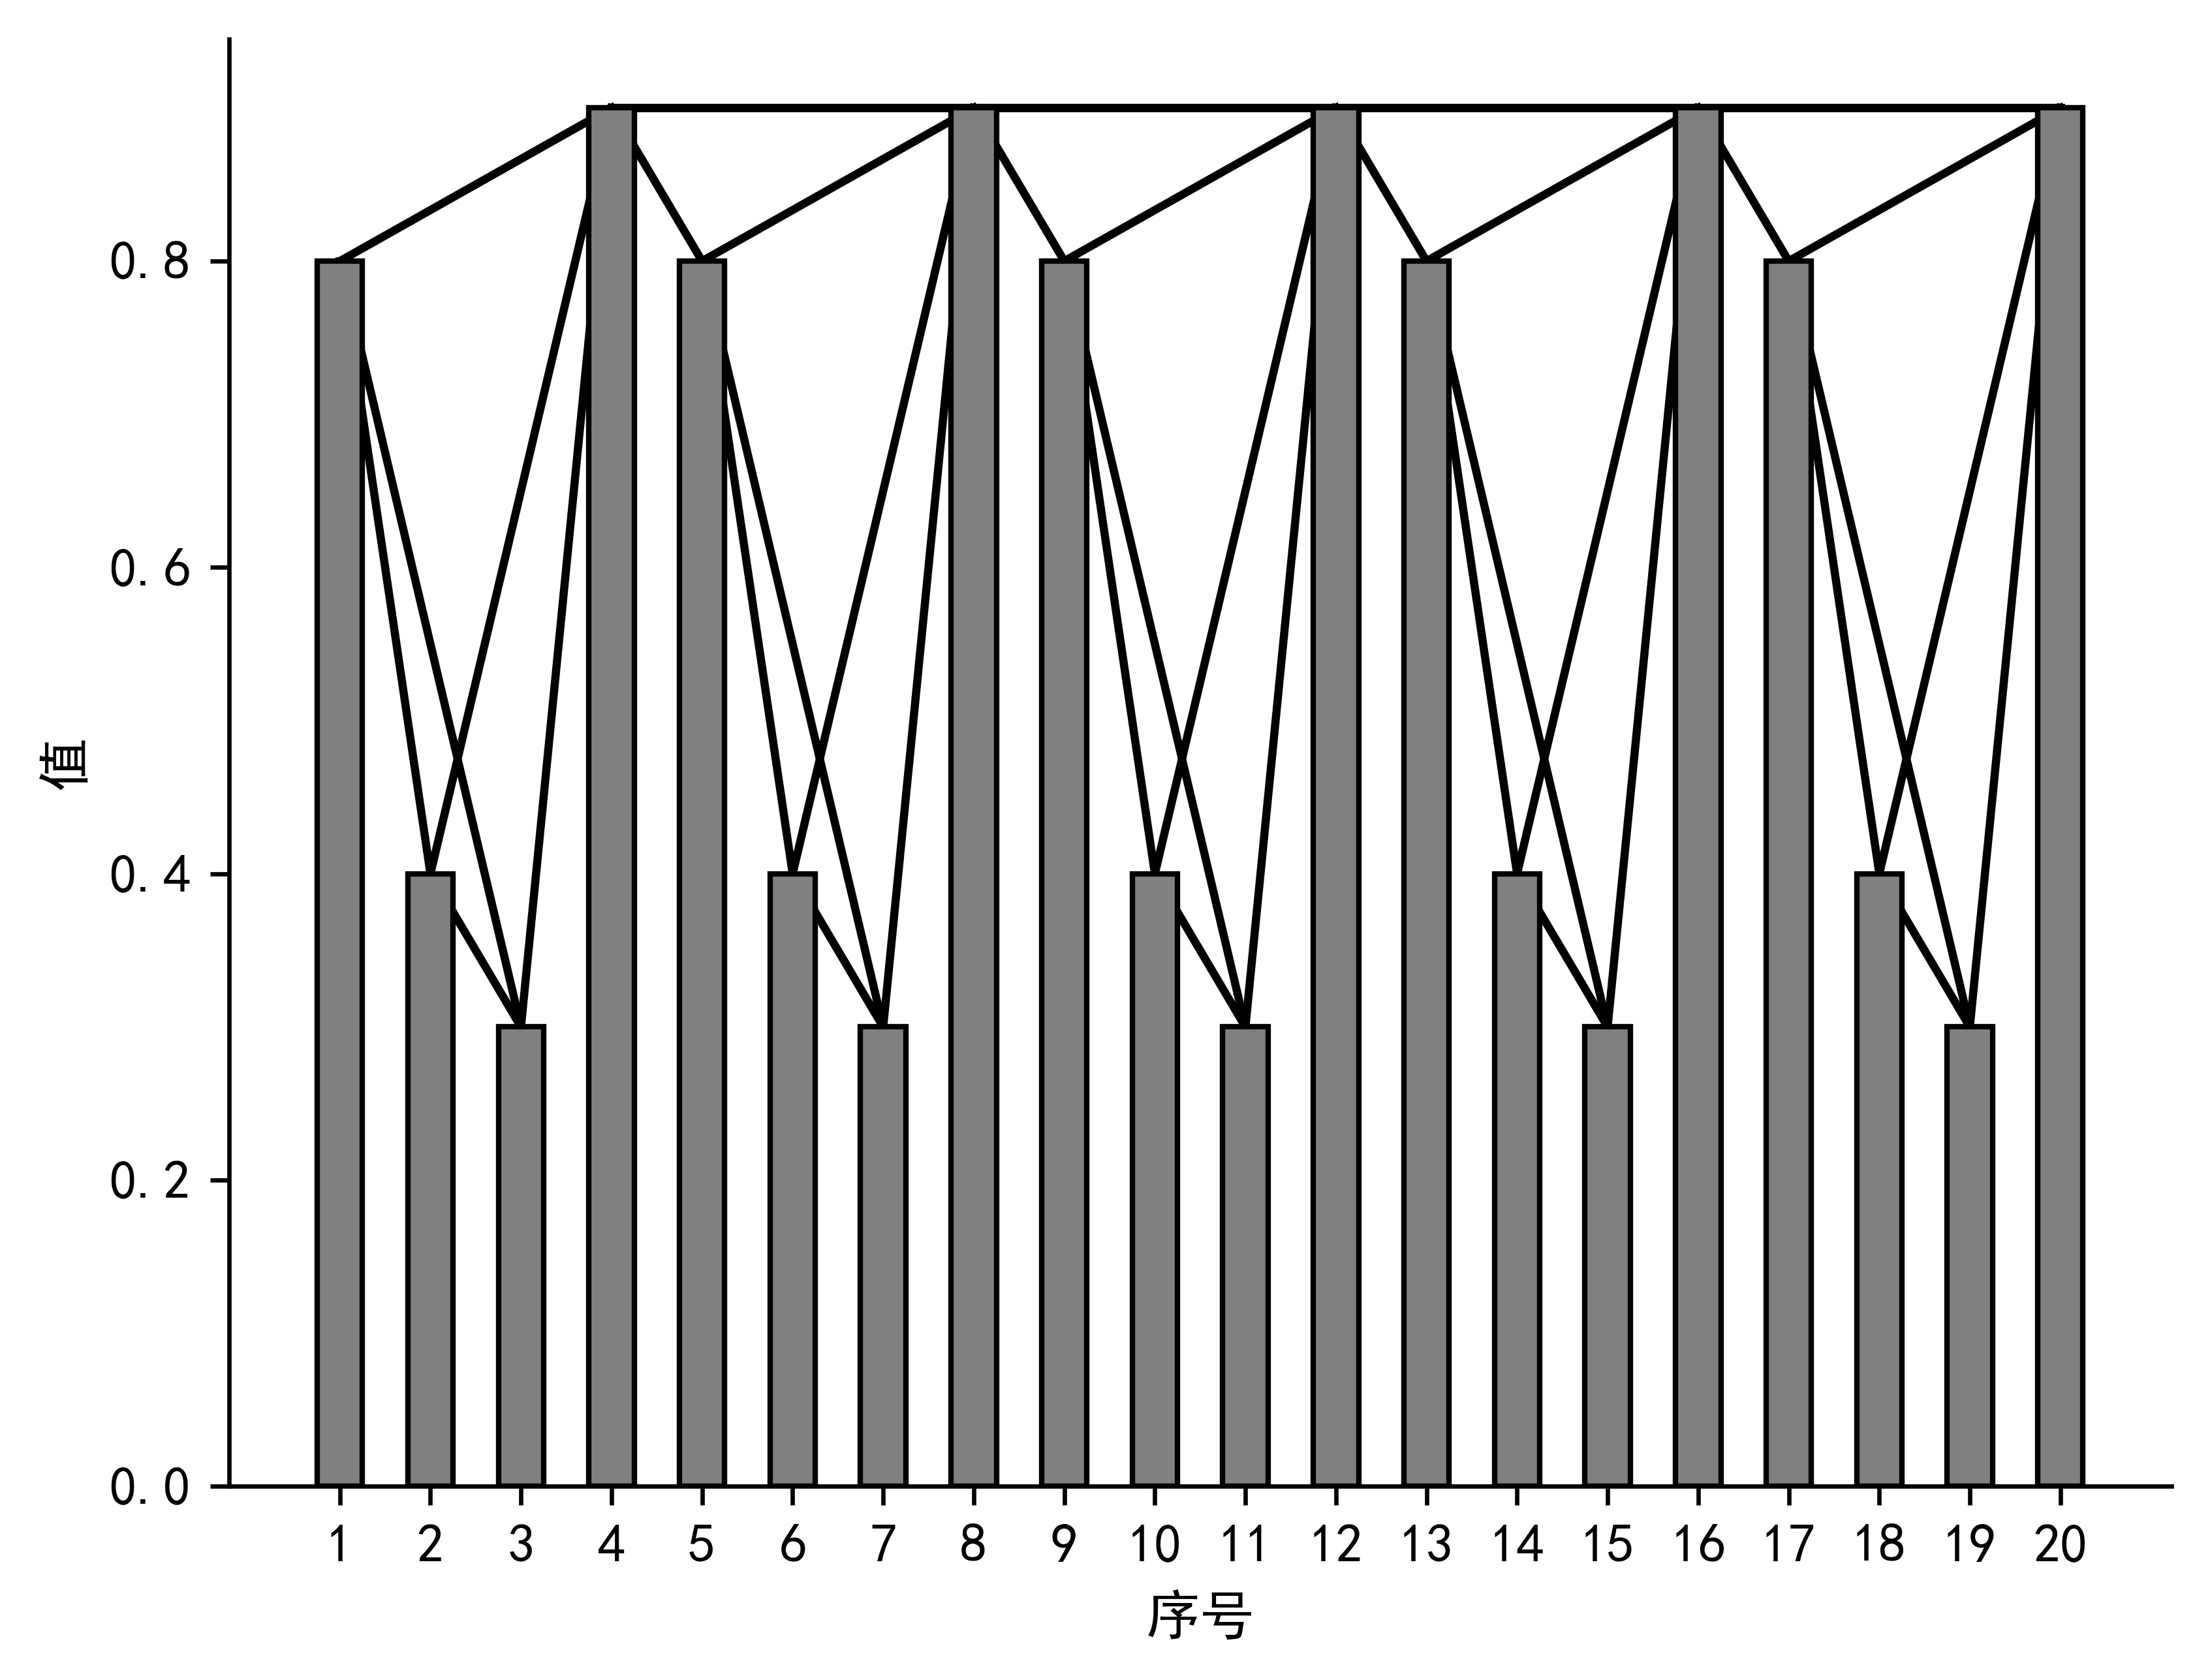

In [4]:
import matplotlib.pyplot as plt

# 中文设置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据
# values = [0.35, 0.68, 0.82, 0.18, 0.35, 0.68, 0.82, 0.18, 0.35, 0.68, 0.82, 0.18]
values = [0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9, 0.8, 0.4, 0.3, 0.9]
indices = list(range(1, len(values) + 1))

# 绘制柱状图
plt.bar(indices, values, color='grey', edgecolor='black', zorder=1, width=0.5)

# 绘制连线，只有当一条线的两个端点之间的所有点都位于这两点连线的下方时才绘制
def can_connect(i, j, values):
    # 获取两点
    x1, y1 = i+1, values[i]
    x2, y2 = j+1, values[j]

    # 计算直线方程 y = mx + c 的系数 m 和 c
    m = (y2 - y1) / (x2 - x1)
    c = y1 - m * x1

    # 检查中间的点是否都在直线下方
    for k in range(i+1, j):
        yk = values[k]
        xk = k+1
        # 计算直线在 xk 处的 y 值
        line_y = m * xk + c
        # 如果点在直线上方，返回 False
        if yk > line_y:
            return False
    return True

# 绘制符合条件的连线
for i in range(len(values)):
    for j in range(i+1, len(values)):
        if can_connect(i, j, values):
            plt.plot([indices[i], indices[j]], [values[i], values[j]], 'k-', zorder=0)

# 设置所有值的统一高度
value_height = max(values) + 0.02 # 设定一个固定的高度，略高于最高柱子
for i, v in enumerate(values):
    plt.text(i + 1, value_height, str(v), ha='center', va='bottom')

plt.xlabel('序号')
plt.ylabel('值')
plt.xticks(indices)

# 不显示右方和上方的边框
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 设置图的dpi为600
plt.gcf().set_dpi(600)

# 显示图表
plt.show()
